# Welcome to the Intro to Machine Learning with TritonHacks 2024!

### Importing Packages
Import statements allow us to use library and built-in functions within the library so we can utilize them!\
First, we are going to import packages that are going to be very basic for the Data Science Project!

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import mean_absolute_error as mae
import warnings
warnings.filterwarnings('ignore')

Now, we will load the data. For now, let's use the given structure and dataset.

If you are using Google Colab to edit this Notebook, please uncomment the code block below so that you can upload `train_extended.csv` to the workspace. 

In [148]:
# from google.colab import files
# uploaded = files.upload()

The `read_csv()` function will allow us to load the dataset in `.csv` format into the format called DataFrame, which is a super common form of data in Data Science.\
You do not have to follow our structure entirely and may replace the string in `read_csv()` as necessary with the anticipated path.\
The `head()` function is a built in function within the Dataframe which only lets you see the top portion of it.

In [5]:
data = pd.read_csv('../data/train_extended.csv') # Modify the file path inside the .read_csv() function as necessary. 
data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


Let's take a look of the columns we have right now:

In [6]:
data.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

It seems like the column `id` is just an index, which won't be helpful. Therefore, we will drop that column. 

In [7]:
data = data.drop(['id'],axis=1)
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


# Baseline Model

Let's start with the most basic model! We are going to be use the linear regression model from `scikit-learn`.\
This will be our very base model and your goal is to build a model that performs better!

## Linear Regression

Linear Regression is a very fundamental algorithm in statistics. The simplest way to explain it is to find the "line of best fit".\
There will be various factors (which we call "variables") such as length, diameter, etc., and the model will determine the age based on those factors.\
As a data scientist, one of our main jobs is to find the relevant variables based on given information.

So first, we will start by importing the pre-built model:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Since Linear Regression is technically a mathematical equation (or prompt), we will drop the column `sex` because it is a string value and not a number.\
(However, sex might be relavant information that we want to utilize. We will teach you how to utilize them later on).

We will save data without the `sex` column in a seperate DataFrame called `data_no_sex`, since we might still want to have access to the full data.

In [9]:
data_no_sex =  data.drop(['Sex'],axis=1)
data_no_sex.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


In [10]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


## Linear Regression Model

What we are going to do now is split our dataset into 2 different sets: a training set and a test set. What are these?

A training set is used to literally "train" the model. The model will understand the pattern between given variables and determine the value.\
A test set is used to "test" how well our model perform. Using the given function of `scikit-learn`, we will split them into a training set and a test set.

The `test_size` parameter refers the the proportion (size) of the test dataset out of the whole dataset.\
`random_state` is setting a seed. Though `train_test_split` is supposed to be a random function, it actually sees if you are making progress,\
You might want to compare outputs under the same conditions. To do so, we are setting a "seed" (like Minecraft!).

## Independent and Dependent Variables

Independent variables are what we expect will influence dependent variables. A dependent variable is what happens as a result of the independent variable.\
In a machine learning project, we want to 'predict' the dependent variable (or so called 'Y' of the function) using independent variables (or so called 'X').\
In the crab age dataset, we want to predict the age, so age will be the dependent variable (or y) and the rest will be independent variables (or X).

In [12]:
y = data_no_sex['Age']
X = data_no_sex.drop(['Age'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [13]:
print(len(data_no_sex))
print(len(X))
print(len(y))
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

200000
200000
200000
134000
66000
134000
66000


Here, the `fit()` function generates the trained model with the given dataset.

The `score()` function shows how "well" the model fits the data.

A value of 0 shows that the model is completely random (i.e., it can't find any correlation between independent and dependent variables), while a value of 1 is saying the model found a perfect relationship between the independent and dependent variables.
We will measure how well the model performs on both the training set and the testing set. 

Note: It is important to realize that the `score()` function is NOT a reliable indicator of the improvement of the model, since it only measures how well the model fits the data. Other error functions, such as RMSE, MSE, and MAE are better indicators of how well a model is predicting, since we want it to be as accurate as possible (more discussion about these error functions can be found later in the notebook).

In [19]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)


0.5850547046920661

In [20]:
model.score(X_test, y_test)

0.5843721260834411

The model has a slightly lower score on the test set compared to the score on the training set. Why?\
A: It is because the model is trained based on the training set which means the model is "optimized" for the training set and the optimized model is "guessing" based on the test set.

Here's how to view coefficients (which shows that "relationship", or how much each independent variable affects the dependent variable)\
and the intercept (in this case, the y-intercept because we are trying to find the "line of best fit").

In [21]:
print(model.coef_)
print(model.intercept_)

[ 0.6968879   1.92073051 10.49583148  0.24035778 -0.67270173 -0.30180624
  0.55927075]
2.4008549738556626


Now this is the time to see the actual prediction values that our model is generating for both training and test sets. 

In [22]:
train_prediction = model.predict(X_train)
train_prediction


array([ 8.22609159, 11.13267397, 10.8144085 , ...,  9.81120564,
       15.67518525, 13.82155203])

In [23]:
test_prediction = model.predict(X_test)
test_prediction

array([ 5.68287338,  9.2172221 ,  7.08089362, ...,  9.56760369,
       12.0321235 , 12.849743  ])

One of the most common ways to quantify the error of the model is using the Root Mean Squared Error (RMSE).\
Under given predictions of the model, we take each actual (observed) value and calculate the difference between it and the prediction value, square the differences, calculate the mean of the squared differences, and take the square root of it.

This function will allow us to calculate RMSE (the cool thing about the `NumPy` array is that it works as a "vector" or "matrix". We do not need to use any iteration and can just treat it as a number).

We recommend you to use this function to measure the performance of your model

In [24]:
def RMSE(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

In [25]:
train_RMSE = RMSE(y_train, train_prediction)
train_RMSE

2.0671819979401156

In [26]:
test_RMSE = RMSE(y_test, test_prediction)
test_RMSE

2.0844279751296115

### Wait...
If you look back, the predictions are decimal numbers...
but is it possible to have decimal number as your age? (unless you want to be specific and sound like a weirdo).
Therefore, we will use `round()` to round the number to integer.

In [27]:
## [ ... for i in ...] is called list comprehension syntax in Python.
## https://www.w3schools.com/python/python_lists_comprehension.asp refer to this link if you want to know futher about it
prediction = np.array([round(i) for i in model.predict(X_train)])
prediction

array([ 8, 11, 11, ..., 10, 16, 14])

Now it is giving us integer values. Let's see how off we are!

In [28]:
RMSE(y_train,prediction)

2.08722839863291

How about the accuracy on our test set? (This is what we ACTUALLY want to know)

In [29]:
prediction = np.array([round(i) for i in model.predict(X_test)])
RMSE(y_test,prediction)

2.1036872391113657

Overall, we are expecting our model to be off by around 2 years from the actual age. This is not too bad for the very basic approach, but this is not satisfying enough. Are there any other ways to improve our model?

## Preprocessing

 In machine learning, preprocessing involves making the data suitable for our needs. It also involves thinking about which variables could be considered independent variables that influence a dependent variable. 
 
 For example, let's take a look at the DataFrame and think about which independent variables might be good predictors of crab age. 
 
 Consider the variables "Shucked Weight" (the weight of the crab without the shell) and "Viscera Weight" (the weight around the crab's abdominal organs deep inside its body). Similar to humans, there could be standards for what an acceptable weight may be for crabs. Being too overweight or underweight may cause certain health issues that reduce life span. However, for this notebook, we will consider all independent variables so that you can explore the relationship between them and crab age. 

 First, let's preprocess the data to remove any invalid datapoints:

In [30]:
# Separate by sex
data_male_only = data[data['Sex']=='M']
data_female_only = data[data['Sex']=='F']
data_indeterminate_only = data[data['Sex']=='I']

# Combine for easier access
all_data = {"Male" : data_male_only, "Female" : data_female_only, "Indeterminate" : data_indeterminate_only}

# We can use the male only columns to check both female
# and indeterminate gender because the variables are the same
categories = data_male_only.columns[2:10]

# Remove any data with invalid entries (value <= 0)
for gender in all_data:
    for var in categories:
        all_data[gender] = all_data[gender][all_data[gender][var] > 0]

### Visualizing Data

We can first visualize our data by creating scatterplots between independent variables and dependent variable(crab age). 

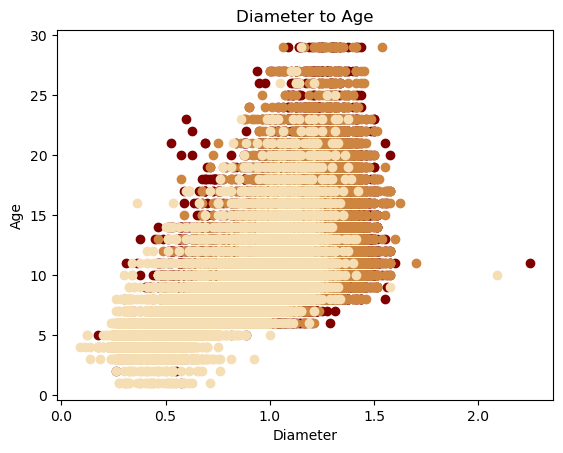

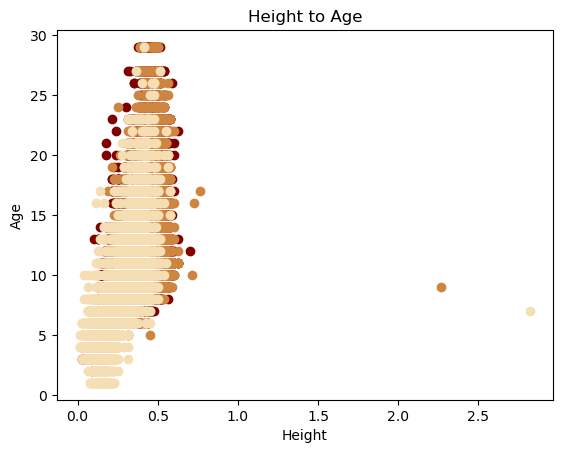

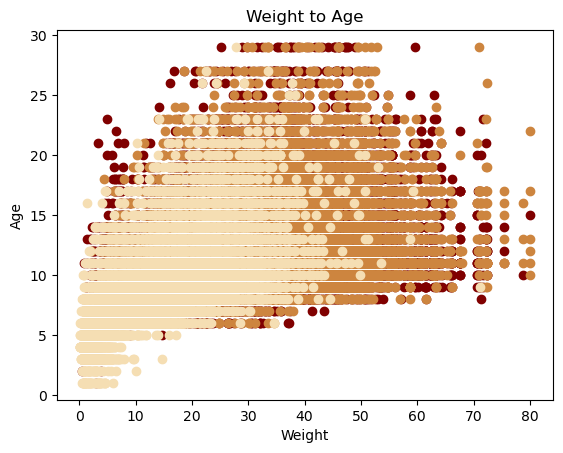

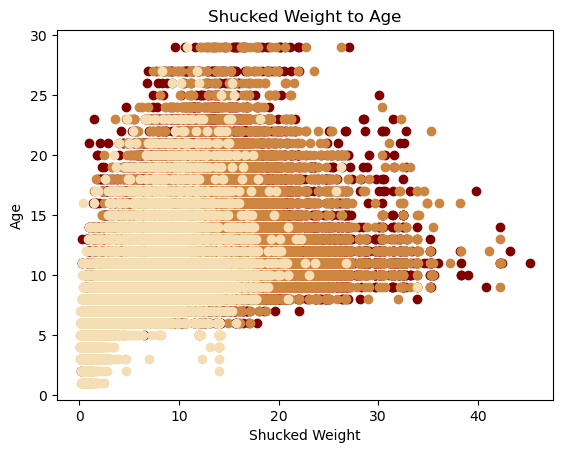

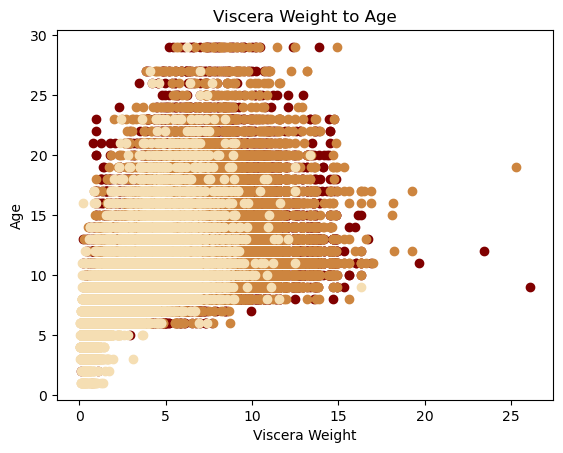

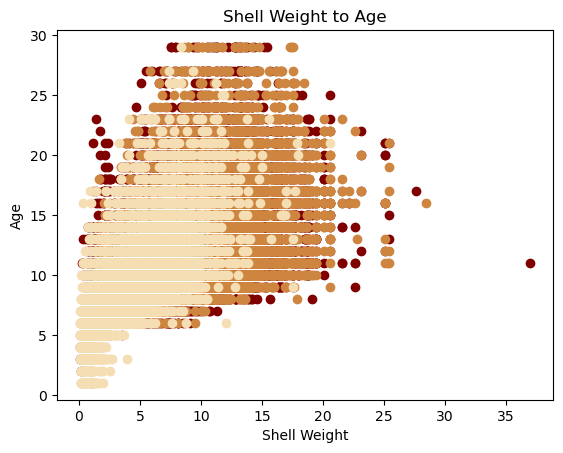

In [31]:
# Draw the scatterplot

# Colors of plots: maroon = male, peru = female, wheat = indeterminate
colors = ["maroon", "peru", "wheat"]

for var in categories[:-1]:

    # Title/axis of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    for i, gender in enumerate(all_data):
        # Get age data, (dependent variable)
        y = all_data[gender]['Age']

        # Get data without sex, and age
        X = all_data[gender].drop(['Sex','Age'],axis=1)

        # Plot data for specific gender
        plt.scatter(X[var], y, c = colors[i])

    # Show plot
    plt.show()

Are you seeing any strong correlation?(to determine those, we want to see if the categorical variable affects the distribution of the value(how scatter or each dot is distributed))

-----------------------------------------------------------

## Calculating Mean Value of Variables

We can start exploring the data by first looking at each variable based on categorical values. In this case, the categorical value is the crab's sex.

In [32]:
all_avgs = {cat : [] for cat in categories}
all_errors = {cat : [] for cat in categories}

for var in categories:

    # Get data specific to variable being considered
    male_data_var = np.array(data_male_only[var])
    female_data_var = np.array(data_female_only[var])
    indeterminate_data_var = np.array(data_indeterminate_only[var])

    # Calculate average using NumPy's in-built functions
    avg_male = np.mean(male_data_var)
    error_male = np.std(male_data_var)

    avg_female = np.mean(female_data_var)
    error_female = np.std(female_data_var)

    avg_indeterminate = np.mean(indeterminate_data_var)
    error_indeterminate = np.std(indeterminate_data_var)

    # Store mean/error in list
    all_avgs[var] = (avg_male, avg_female, avg_indeterminate)
    all_errors[var] = (error_male, error_female, error_indeterminate)



In [33]:
for i, gender in enumerate(all_data):
    print("{} Only Data".format(gender))

    for var in categories:
        print("Variable {} Average: {:.3f}".format(var, all_avgs[var][i]))
        
    print("\n")

Male Only Data
Variable Diameter Average: 1.122
Variable Height Average: 0.383
Variable Weight Average: 28.230
Variable Shucked Weight Average: 12.226
Variable Viscera Weight Average: 6.101
Variable Shell Weight Average: 8.039
Variable Age Average: 10.935


Female Only Data
Variable Diameter Average: 1.151
Variable Height Average: 0.396
Variable Weight Average: 30.006
Variable Shucked Weight Average: 12.804
Variable Viscera Weight Average: 6.519
Variable Shell Weight Average: 8.609
Variable Age Average: 11.447


Indeterminate Only Data
Variable Diameter Average: 0.791
Variable Height Average: 0.260
Variable Weight Average: 11.274
Variable Shucked Weight Average: 4.982
Variable Viscera Weight Average: 2.393
Variable Shell Weight Average: 3.300
Variable Age Average: 7.511




Seems like there are some differences in the mean values of each category so it seems like this category has some relationship to the crab age.

### Visualizing Mean Value of Variables

We can use `Matplotlib` to plot the mean value of each variable based on the crab's sex.

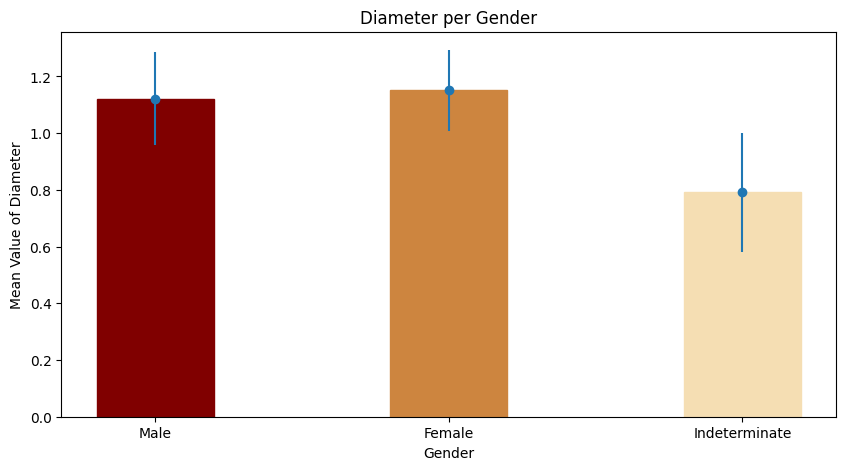

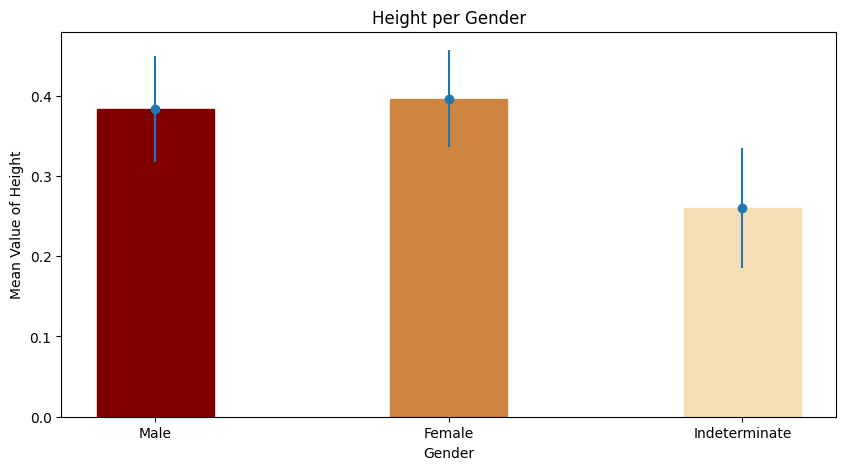

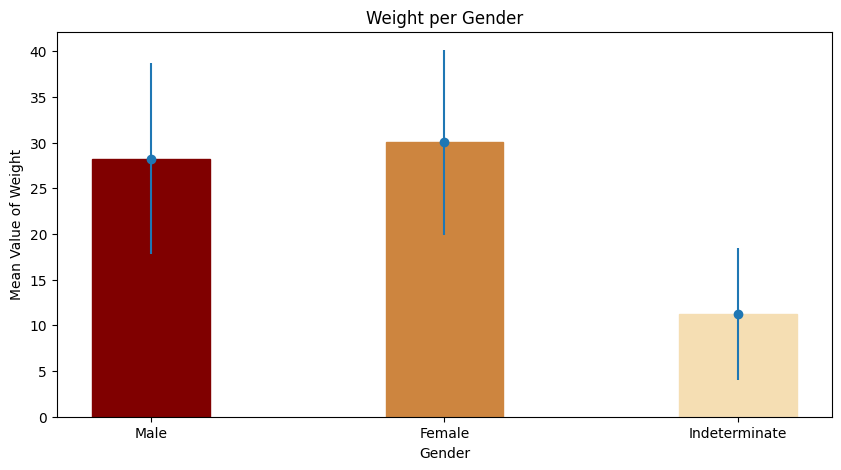

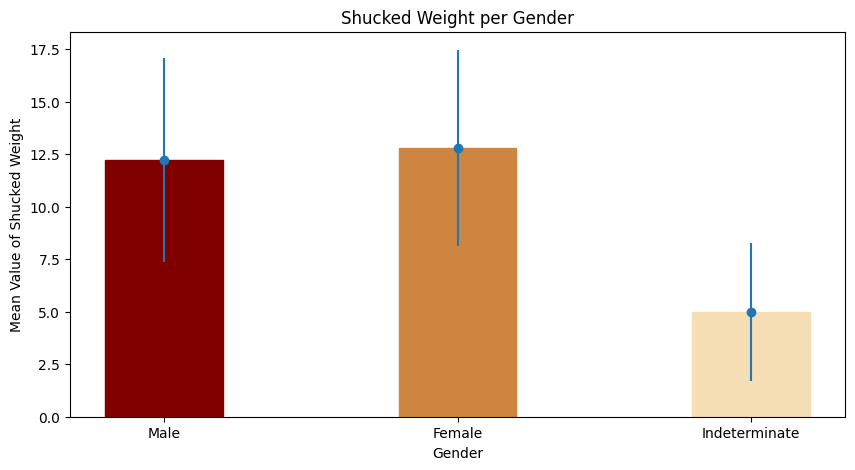

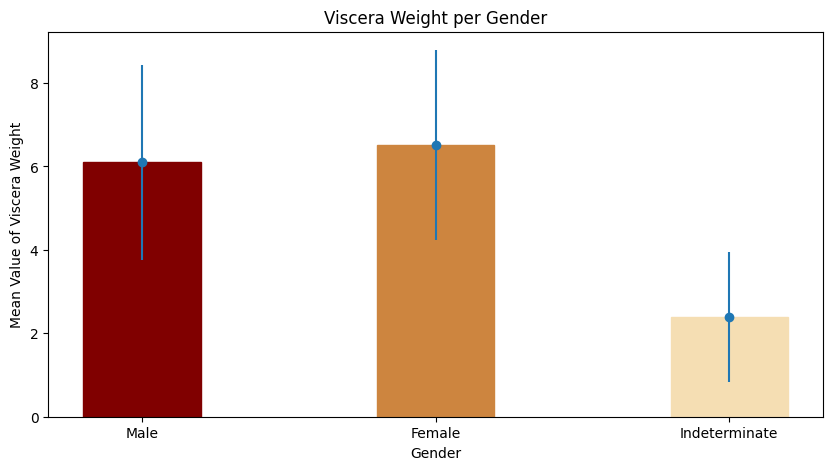

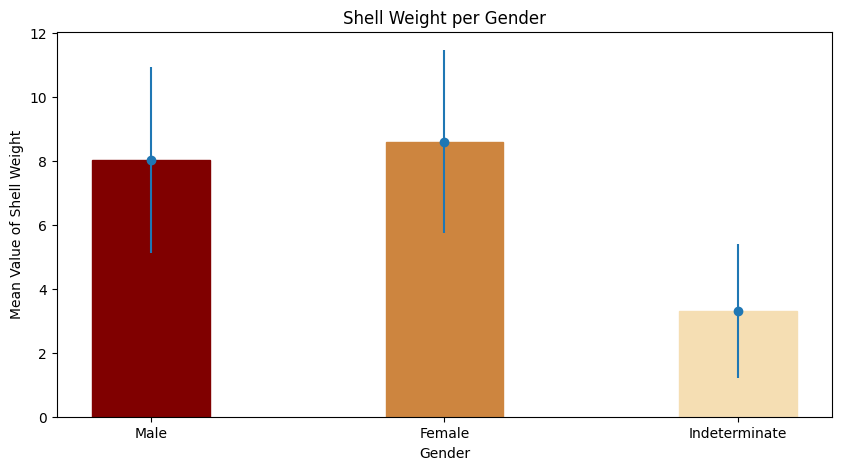

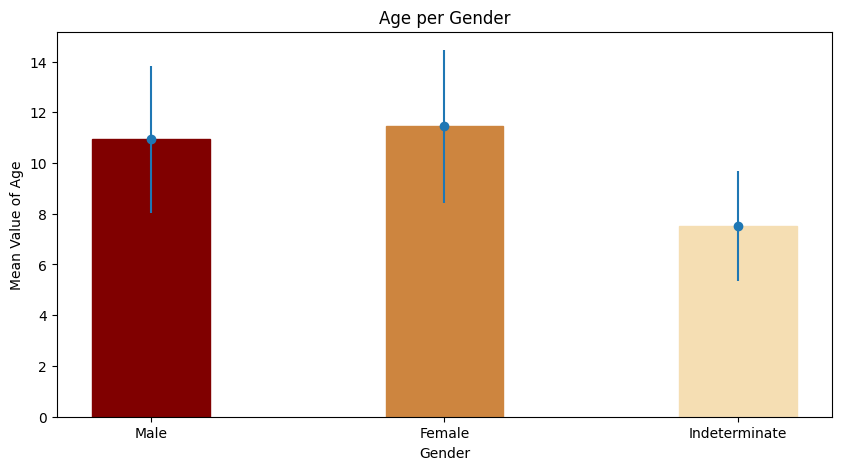

In [172]:
# Bar chart visualization

for var in categories:
    fig = plt.figure(figsize = (10, 5))
    
    # creating the bar plot
    bar_plt = plt.bar(all_data.keys(), list(all_avgs[var]), width = 0.4)
    plt.errorbar(all_data.keys(), list(all_avgs[var]), all_errors[var], linestyle='None', marker='o')
    
    bar_plt[0].set_color("maroon")
    bar_plt[1].set_color("peru")
    bar_plt[2].set_color("wheat")

    plt.xlabel("Gender")
    plt.ylabel("Mean Value of {}".format(var))
    plt.title("{} per Gender".format(var))
    plt.show()

-----------------------------------------------------------

## Calculating Correlation Between Variables
Now that we have a basic understanding of the data, let's look for correlations between different variables. Since we want to predict the average age, we'll experiment with data from columns 3 to 9 ('length' through 'shell weight'). This will be the X variable and we can set age as the y variable. We use Pearson R to find the correlation coefficient. R values closer to 1 or -1 have a strong correlation, while an R value of 0 has no correlation.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

In [34]:
for gender in all_data:
    print("Correlation Coefficients {}".format(gender))
    for var in categories[:-1]:
        X = list(all_data[gender][var])
        y = list(all_data[gender]['Age'])

        corr, _ = pearsonr(X,y)

        print('{}: {:.3f}'.format(var, corr))
    print("\n")


Correlation Coefficients Male
Diameter: 0.352
Height: 0.428
Weight: 0.360
Shucked Weight: 0.195
Viscera Weight: 0.312
Shell Weight: 0.481


Correlation Coefficients Female
Diameter: 0.250
Height: 0.345
Weight: 0.277
Shucked Weight: 0.086
Viscera Weight: 0.221
Shell Weight: 0.414


Correlation Coefficients Indeterminate
Diameter: 0.723
Height: 0.731
Weight: 0.729
Shucked Weight: 0.660
Viscera Weight: 0.714
Shell Weight: 0.765




### Visualizing Correlation

We can use the scatterplot from `Matplotlib` to visualize the data.

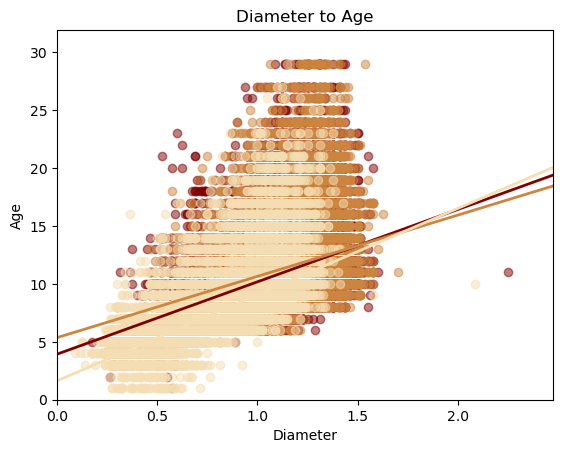

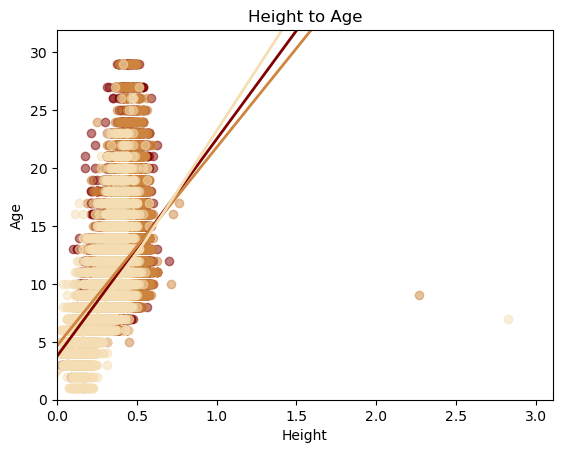

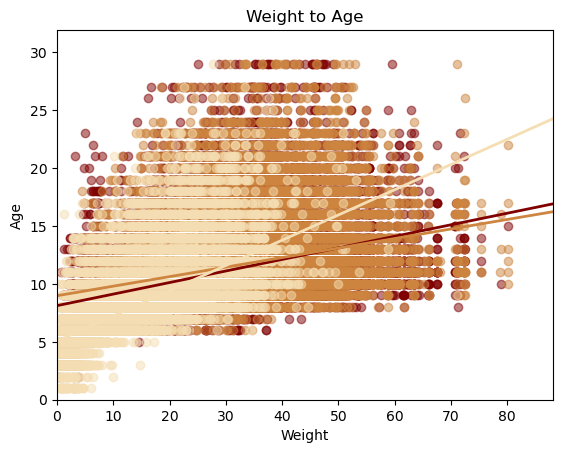

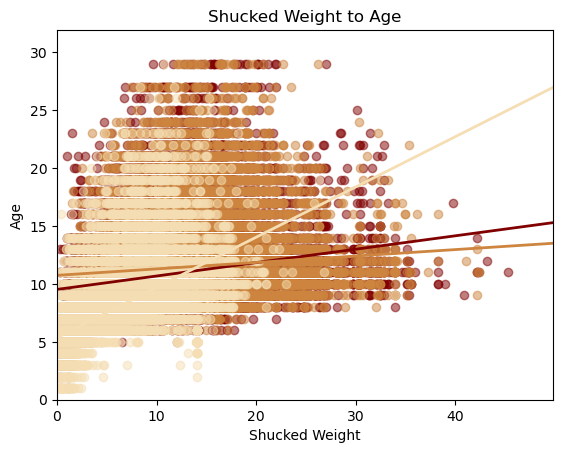

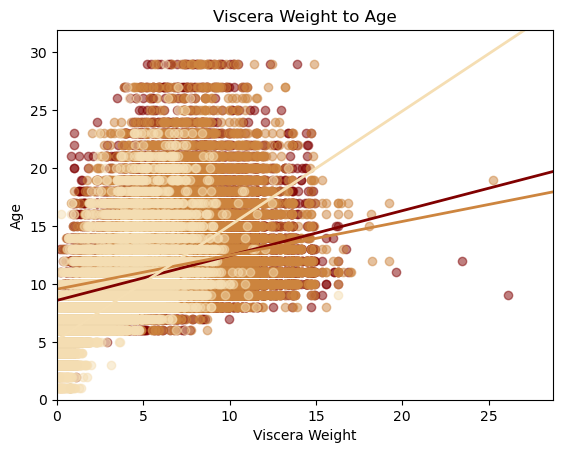

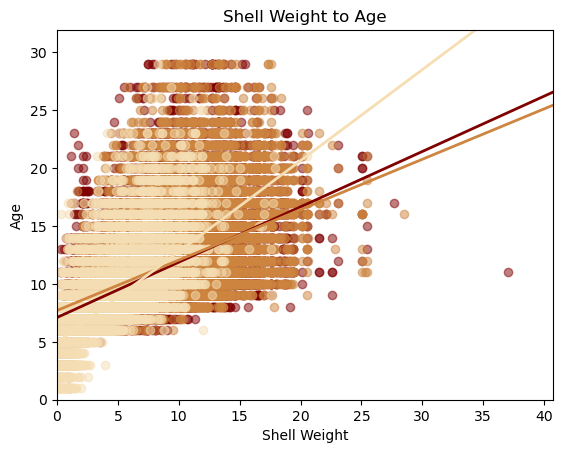

In [35]:

for var in categories[:-1]:

    # Title and labels of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    # Limits of axis (used to scale plots)
    X_max = 0
    y_max = 0
    
    for i, gender in enumerate(all_data):

        y = all_data[gender]['Age'] # Get age data, (dependent variable)

        X = all_data[gender].drop(['Sex','Age'],axis=1) # Get data without  sex, and age

        # Update max X/y of plot
        X_max = max(np.max(X[var]), X_max)
        y_max = max(np.max(y), y_max)
        
        lsq = np.polyfit(X[var], y, 1) # Calculate line of best fit

        plt.scatter(X[var], y, c = colors[i], alpha = 0.5) # Plot points on scatterplot

        x_extend = np.linspace(0, 100, 100) # Extend line of best fit to edge of graph

        plt.plot(x_extend, np.polyval(lsq, x_extend), color = colors[i], linestyle = '-', linewidth = 2) # Draw line of best fit

    # Set limit of plot axis and show plot
    plt.xlim(0, X_max + 0.1 * X_max)
    plt.ylim(0, y_max + 0.1 * y_max)
    plt.show()
    print("\n")


## Removing Outliers

In the above example, there are clearly data points that lie far outside the range of the majority. To fix this, we can remove any data that is outside 1.5 * IQR (interquartile range) above Q3 or below Q1. 

In [36]:
for var in categories[:-1]:
    for gender in all_data:
        X = all_data[gender].drop(['Sex','Age'],axis=1) # Get data without sex, and age

        q3, q1 = np.percentile(X[var], [75,25]) # Calculate quartiles 
        iqr = q3 - q1; # Find IQR

        # Remove values that lie 1.5 * IQR beyond Q1 and Q3
        all_data[gender] = all_data[gender][(X[var] >= q1 - 1.5 * iqr) & (X[var] <= q3 + 1.5 * iqr)]

### Recomputing Correlation
We can recompute the correlation with the outliers removed:

In [37]:
for gender in all_data:
    print("Correlation Coefficients {}".format(gender))
    for var in categories[:-1]:
        X = all_data[gender][var]
        y = all_data[gender]['Age']
        corr, _ = pearsonr(X,y)

        print('{}: {:.3f}'.format(var, corr))
    print("\n")


Correlation Coefficients Male
Diameter: 0.261
Height: 0.359
Weight: 0.287
Shucked Weight: 0.097
Viscera Weight: 0.231
Shell Weight: 0.426


Correlation Coefficients Female
Diameter: 0.214
Height: 0.322
Weight: 0.242
Shucked Weight: 0.043
Viscera Weight: 0.184
Shell Weight: 0.383


Correlation Coefficients Indeterminate
Diameter: 0.719
Height: 0.728
Weight: 0.713
Shucked Weight: 0.656
Viscera Weight: 0.702
Shell Weight: 0.745




### Visualizing Correlation (without outliers)

And now, we redo our plot above with the outliers removed:

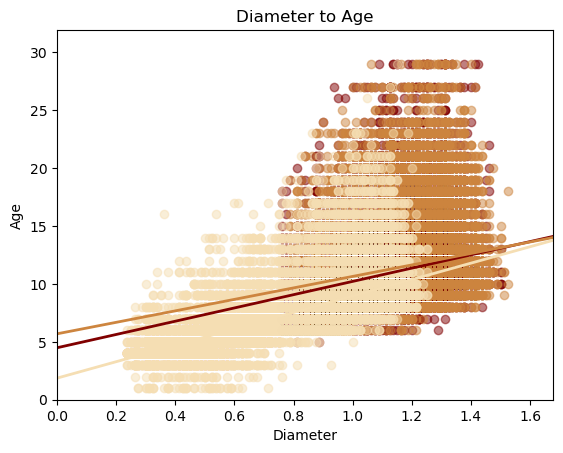

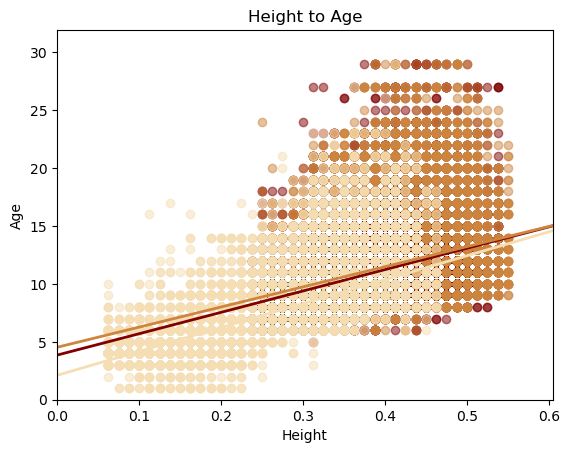

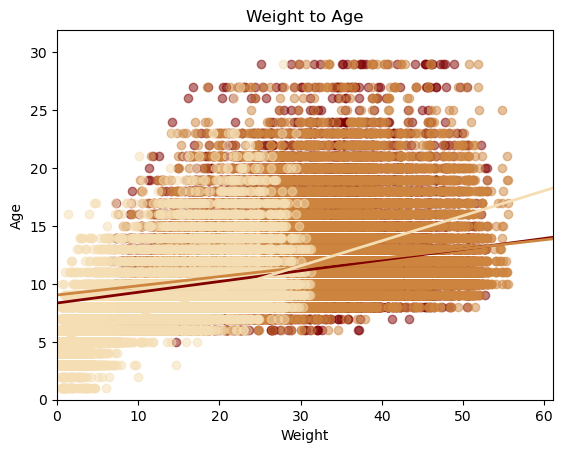

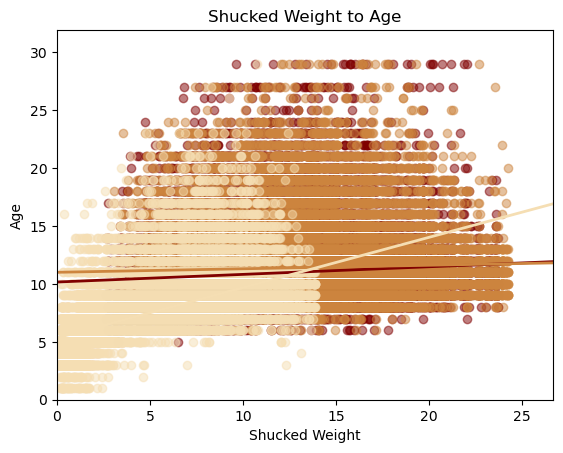

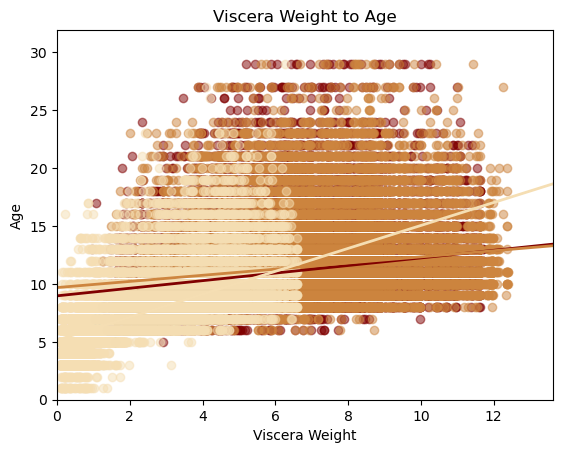

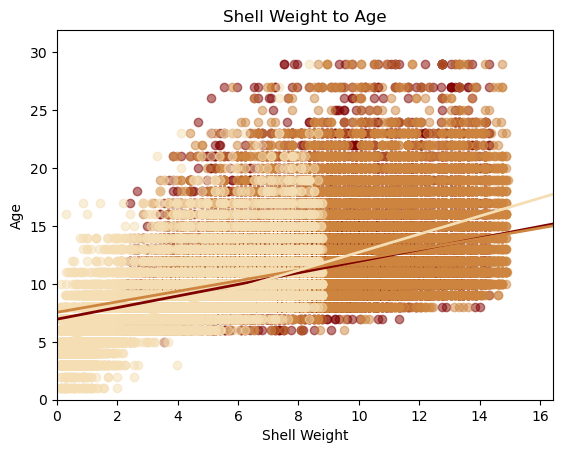

In [38]:
# Plot with outliers removed

for var in categories[:-1]:

    # Title and labels of plot
    plt.title("{} to Age".format(var))
    plt.xlabel(var)
    plt.ylabel("Age")

    # Limits of axis (used to scale plots)
    X_max = 0
    y_max = 0
    
    for i, gender in enumerate(all_data):

        y = all_data[gender]['Age'] # Get age data, (dependent variable)

        X = all_data[gender].drop(['Sex','Age'],axis=1) # Get data without sex, and age

        # Update max X/y of plot
        X_max = max(np.max(X[var]), X_max)
        y_max = max(np.max(y), y_max)
        
        lsq = np.polyfit(X[var], y, 1) # Calculate line of best fit

        plt.scatter(X[var], y, c = colors[i], alpha = 0.5) # Plot points on scatterplot

        x_extend = np.linspace(-100, 100, 100) # Extend line of best fit to edge of graph

        plt.plot(x_extend, np.polyval(lsq, x_extend), color = colors[i], linestyle = '-', linewidth = 2) # Draw line of best fit

    # Set limit of plot axis and show plot
    plt.xlim(0, X_max + 0.1 * X_max)
    plt.ylim(0, y_max + 0.1 * y_max)
    plt.show()
    print("\n")


Seems like there might be some variables that has some relationships with the dependent variable. Is there any other possible ways that is more obvious then just a visualization?

## ANOVA

Analysis of variance (ANOVA) is a statistical test used to evaluate the difference between the means of more than two groups. This statistical analysis tool separates the total variability within a data set into two components: random and systematic factors.
For instance, does the sex has statisgically significant relationship with the other crab variables? Let's see.

We want to see if categorical variable (in this case, sex) has any significance to be added to the model's variable. In order to do so, seperate our data with each category. Then, run the test using f_oneway(this is the scipy's function that runs one way anova) on the variable that we are curious about to see the p-value. \
As p-value is lower, it means that the difference between each group is less likely to be caused by random factor(which means it is more likely to have some meanings or significance). \
In our case, let's see if sex has anything to do with the wieght of the crab.  

In [42]:
from scipy.stats import f_oneway
all_data = {"Male" : data_male_only, "Female" : data_female_only, "Indeterminate" : data_indeterminate_only}
f_oneway(all_data['Male']['Weight'],all_data['Female']['Weight'], all_data['Indeterminate']['Weight'])

F_onewayResult(statistic=80288.7764921783, pvalue=0.0)

P-value in this case is 0(which is not actually 0 but implies that it is extremely low) so we know weight is statistically significant!\
You can use this to any variables and try yourself.

## One Hot Encoding

Earlier, we mentioned how nominal data cannot be accounted for numerically because it is by definition, non-numerical. In order to factor in nominal data from our linear regression model, we must encode these categories, like sex, into numbers. To do this, we can use the One Hot Encoder from `sklearn`. 

In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(data[['Sex']])
ohetransform

,Sex_0.025,Sex_F,Sex_I,Sex_M
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
199995,0.0,1.0,0.0,0.0
199996,0.0,1.0,0.0,0.0
199997,0.0,0.0,0.0,1.0
199998,0.0,0.0,1.0,0.0


Now, let's append these numerical values for sex into our dataset:

In [44]:
data_encoded = pd.concat([data, ohetransform], axis = 1).drop(columns = ['Sex', 'Sex_0.025'])
data_encoded.head(10)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0,0.0,0.0,1.0
1,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0,0.0,1.0,0.0
2,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0,1.0,0.0,0.0
3,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0,0.0,1.0,0.0
4,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0,0.0,1.0,0.0
5,1.4875,1.1875,0.4000,28.335325,12.048538,7.668540,8.504850,10.0,1.0,0.0,0.0
6,1.5250,1.1875,0.4375,31.581343,11.382324,7.980384,9.213587,14.0,0.0,0.0,1.0
7,1.6250,1.2875,0.4375,42.212406,17.704263,8.660772,11.339800,13.0,0.0,0.0,1.0
8,1.3375,1.0500,0.3875,23.090668,12.048538,4.379998,6.038443,9.0,0.0,0.0,1.0
9,1.3375,1.0125,0.3375,18.313777,8.944267,4.195726,5.953395,10.0,1.0,0.0,0.0


Now that we have our updated dataset, let's see if encoding sex improves the accuracy of our model. 

In [45]:
y = data_encoded['Age']
X = data_encoded.drop(['Age'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
model = LinearRegression().fit(X_train, y_train)
model_with_sex = model.score(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5957183188438926
0.595010517849757


And now to find the RMSE for the training and test sets:

In [46]:
train_prediction = model.predict(X_train)
train_prediction

array([ 7.79103355, 11.29411687, 10.91507836, ...,  9.10431988,
       15.74177025, 13.85750749])

In [47]:
test_prediction = model.predict(X_test)
test_prediction

array([ 5.68191237,  9.46693282,  6.77226033, ...,  9.03368426,
       12.15939994, 12.90832324])

In [48]:
train_RMSE = RMSE(y_train, train_prediction)
train_RMSE

2.0404470223107523

In [49]:
test_RMSE = RMSE(y_test, test_prediction)
test_RMSE

2.05757859169053

This improved the model performance slightly and you might have already expected that if you performed EDA and different test to see if sex has any statistical significancy. If you are using different dataset, please always prove and check to see if your conclusion in EDA aligns with the model performance.

Now, let's take a look at a another method to enhance model performance and improve the interpretability of the data: normalization. 

# Data Normalization Techniques 

Data normalization is a data preprocessing technique which rescales the numerical features of a dataset to a standard range. In other words, we want to "level the playing field" for all variables so that certain variables do not dominate others trivially.

First, we will show linear normalization, otherwise known as "min-max scaling".

## Min-Max Scaling 

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

NormData = scaler.fit_transform(data_encoded)

NormData = pd.DataFrame(NormData, columns = data_encoded.columns)
NormData

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.207688,0.544444,0.132743,0.389626,0.271531,0.241585,0.259387,0.321429,0.0,0.0,1.0
1,0.163183,0.444444,0.132743,0.272969,0.168807,0.144951,0.205747,0.642857,0.0,1.0,0.0
2,0.191205,0.516667,0.146018,0.352452,0.245537,0.268187,0.195019,0.357143,1.0,0.0,0.0
3,0.178018,0.455556,0.132743,0.269251,0.214845,0.156895,0.171264,0.285714,0.0,1.0,0.0
4,0.149997,0.388889,0.101770,0.186582,0.131225,0.112921,0.099234,0.250000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
199995,0.239006,0.566667,0.154867,0.525934,0.441591,0.381650,0.312644,0.357143,1.0,0.0,0.0
199996,0.130217,0.300000,0.084071,0.099310,0.082368,0.072747,0.060153,0.178571,1.0,0.0,0.0
199997,0.148349,0.405556,0.101770,0.135599,0.108049,0.075461,0.083142,0.214286,0.0,0.0,1.0
199998,0.214281,0.566667,0.146018,0.422907,0.291262,0.300760,0.282375,0.357143,0.0,1.0,0.0


Linear normalization transforms each data point to a value within the range of 0 to 1. This crucial preprocessing step ensures that the magnitudes of various data categories are uniformly scaled, preventing any potential misinterpretation of their relative importance. 

## Z-Score Normalization

Often called standardization, the z-score method transforms a dataset to have a mean value of 0 and deviation of 1. This makes the data more digestible for certain ML algorithms, such as principal component analysis (PCA), and mitigates the effect that outliers have on the data. 

For now, we will perfrom 2 differnt normalization methods without incoperating sex variable to see if normalization improves the model from the baseline result.

In [52]:
df_z_scaled = data_encoded.copy() 

## Standardization is applied only to continues numerical values, so here we drop binary encoding for sex
df_z_scaled = df_z_scaled.drop(columns = ['Sex_F', 'Sex_I', 'Sex_M'])

## We subtract the avg value of each feature from every data point, and then divide by the amount that it deviates from the average
for column in df_z_scaled.columns: 
	df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()	 
 
df_z_scaled

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0.905873,0.857393,0.317751,0.643249,0.412950,0.476990,0.844764,0.015351
1,-0.258590,-0.085121,0.317751,-0.098241,-0.416642,-0.428741,0.286818,2.812912
2,0.474590,0.595583,0.729032,0.406962,0.203023,0.726321,0.175229,0.326191
3,0.129564,0.019603,0.317751,-0.121870,-0.044843,-0.316796,-0.071861,-0.295489
4,-0.603616,-0.608740,-0.641903,-0.647326,-0.720151,-0.728955,-0.821103,-0.606329
...,...,...,...,...,...,...,...,...
199995,1.725309,1.066840,1.003219,1.509634,1.786329,1.789791,1.398725,0.326191
199996,-1.121156,-1.446530,-1.190277,-1.202037,-1.114713,-1.105495,-1.227607,-1.228009
199997,-0.646745,-0.451654,-0.641903,-0.971376,-0.907315,-1.080053,-0.988487,-0.917169
199998,1.078386,1.066840,0.729032,0.854782,0.572292,1.031623,1.083884,0.326191


In [53]:
y = df_z_scaled['Age'] # try min max scale to see which one improves your model better
X = df_z_scaled.drop(['Age'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5850547046920661
0.5843721260834411


And now to find the RMSE for the training and test sets:

In [54]:
train_prediction = model.predict(X_train)
train_prediction

array([-0.53605098,  0.3674313 ,  0.26850163, ..., -0.04333402,
        1.77942584,  1.20324235])

In [55]:
test_prediction = model.predict(X_test)
test_prediction

array([-1.32658512, -0.2279679 , -0.89202441, ..., -0.11905527,
        0.64701625,  0.90116516])

In [56]:
train_RMSE = RMSE(y_train, train_prediction)
train_RMSE

0.6425630045752265

In [57]:
test_RMSE = RMSE(y_test, test_prediction)
test_RMSE

0.6479237453957061

Did the normalization improved your model? If it did,(or did not) try to combine one hot encoding on your categorical variable with normalization on numerical variables together to see if the model performs better(DO NOT normalize one hot encoded values, combine after other numerical variables are normalized).

## Is the Model Overfitting?

What other tests can we run on our model? One thing we can do is test for overfitting. This is when a model 'adjusts' to predict training data, but is unable to predict new data. To test if our model is overfitting, we can look at error values: if the training data has a low error rate but the test data has a high error rate, this indicates that the model is overfitting.

## Mean Squared Error, Mean Absolute Error
There are different ways to calculate error. Remember that we already calculated RMSE (root mean squared error). RMSE is just the square root of Mean Squared Error, which is the average of the squared differences between our predicted and actual values. There is also MAE, or Mean Absolute Error. MAE is essentially the same, except we take the absolute value of the differences without squaring. Here's a quick breakdown of their pros and cons:
### MSE:
It is harder to interpret, since it is in units that are the square of the data. Like RMSE, it penalizes large errors more, making it more sensitive to outliers.
### RMSE:
It is easy to interpret since it shares the same units as the data, so it is more widely used. Like MSE, it penalizes large errors more, making it more sensitive to outliers.
### MAE:
It is easy to understand and interpret!\
Use MAE if you want to consider outliers less- It is not as sensitive to outliers, since it considers all errors with equal weight. 

First, let's go back to our baseline model.

In [58]:
data_no_sex =  data.drop(['Sex'],axis=1)
y = data_no_sex['Age']
X = data_no_sex.drop(['Age'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

model = LinearRegression().fit(X_train, y_train)

prediction = np.array([round(i) for i in model.predict(X_train)])
prediction

array([ 8, 11, 11, ..., 10, 16, 14])

To recap, here is the RMSE function we wrote earlier:

In [59]:
def RMSE(y,pred):
    return np.sqrt(np.mean((y-pred)**2))

Let's create functions for MSE and MAE ourselves! MSE will be like the RMSE function we wrote, except without the square root. And for our MAE function, we need to replace the square with an absolute value.

In [60]:
def MSE(y,pred):
    return np.mean((y-pred)**2)
    
def MAE(y,pred):
    return np.mean(abs(y-pred))

Now, let's calculate the MSE and MAE for our model on training data.

In [63]:
prediction = np.array([round(i) for i in model.predict(X_train)])
MSE(y_train,prediction)

4.356522388059702

In [64]:
MAE(y_train,prediction)

1.4276268656716418

Next, let's calculate the MSE and MAE for our model on testing data.

In [65]:
prediction = np.array([round(i) for i in model.predict(X_test)])
MSE(y_test,prediction)

4.4255

In [66]:
MAE(y_test,prediction)

1.4316818181818183

We found that the error slightly increased on testing data. This is fairly normal, but could indicate possible overfitting. To do further testing, we can try something called K-fold cross validation.
## Cross-Validation
Before we created our model, we had to divide our data into a training set and a testing set. If we want to test our model more, we can use cross-validation.
Cross-validation shuffles the data and splits the data into "k" groups, or folds. For example, if k = 10, it is called 10-Fold Cross Validation. First, a single fold is chosen to be the testing group: the model is trained on the other folds, then tested on our group. This is repeated "k" times for all the folds!

![K-fold_image](../images/K-Fold_Cross-Validation.png)


In [67]:
from sklearn.model_selection import KFold, cross_val_score

In [68]:
kfold = KFold(n_splits = 10)
score_ten = cross_val_score(model,X,y, cv=kfold)

In [69]:
print("10-Fold Cross Validation Scores are: {}".format(score_ten))

10-Fold Cross Validation Scores are: [0.57528175 0.58808162 0.5921663  0.57609095 0.588945   0.5880526
 0.58310597 0.59277785 0.58536247 0.57718992]


We successfully got the scores for all 10 times it ran! Let's look at the average score:

In [70]:
print("Average 10-Fold Cross Validation score: {}".format(score_ten.mean()))

Average 10-Fold Cross Validation score: 0.5847054438132044


This is similar to the score we calculated in the Introduction, and so we know our evaluation of our model performance is fairly accurate. 

### Cross Validation and RMSE
We also want to perform k-fold cross validation using RMSE too, so we know what our average error is. Let's do this by changing the `scoring` parameter in `cross_val_score()`, and setting it equal to `neg_root_mean_squared_error`. Let's also make sure to take the absolute value!

In [71]:
rmse_score = abs(cross_val_score(model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(rmse_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.0730391793579086


Great, we can now assess our model with both cross validation and RMSE!
### Why is it important to test with both?
Well, cross validation ensures that we are testing the model on new data each time--we switch up what the "testing" and "training data" are so that we can test our model for overfitting. Also, using an error measure like RMSE evaluates how big our errors are compared to the average. The RMSE isn't our only error measure though; we can use the MAE if we want to consider the outliers less.

Always try to utilize cross validation or k-fold method to prevent your model to overfit no matter what kinds of dataset you are using.

So far, we've been using our linear regression model. Let's try using some other machine learning algorithms and running cross validation on them.

## K-Nearest Neighbors Regression
K-nearest neighbors is another common algorithm we can try. If you imagine all the data points on a graph, it classifies a new point by looking at the "k" number of nearest points. Basically, it groups together nearby points. 

![K-nearest_Neighbor](../images/K-nearest_Neighbors.png)

### Features/Pros:
-It can be used for classification or regression- in this case, we are doing regression! (Our model is looking for numerical ages, whereas classification would be grouping into separate categories.)\
-It is very sensitive to outliers.\
-You don't have to "train" the model, so it is flexible to data changes.\
-It is simple to implement and understand!

### Cons:
-It can be a slow and inefficient if there is a lot of data.\
-It can be hard to find the optimal number of neighbors.\
-Data needs to be balanced over the testing variable for the best results.

Let's import the pre-built model and test it!

In [72]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn_model = KNeighborsRegressor()
rmse_score = abs(cross_val_score(knn_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(rmse_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.1545693942154607


Default KNN regressor from SKlearn uses k=5 as a default. Try to change the values of K to see which value works the best in your case!

In [75]:
knn_model = KNeighborsRegressor(n_neighbors = 6) # you can change n_neighbors to whatever number that you want to see which one works better
rmse_score = abs(cross_val_score(knn_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(rmse_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.1259609748386743


You can also perform KNN model training on preprocessed data(normalization, one hot encoding, etc.). If you are also curious different types of hyperparameter other than n_neighbors, please look into this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

## Decision Tree
Decision tree is another popular algorithm we can test. It creates a tree map that splits into more and more nodes as it takes into account the different variables. Here is a a tree visualization, with each decision splitting each "branch" into two nodes:

![decisiontree1](../images/DecisionTree1.png)

Behind the scenes, each "decision" that splits a node is like drawing a line segment dividing the data into two groups. In the graph below, each line segment corresponds to a split. 

![decisiontree1.png](../images/DecisionTree2.png)
After drawing all these line segments, you get a lot of different regions of points! The model calculates the average of the points in each region and takes all the averages to make a prediction.

### Features compared to K-Nearest Neighbors:
-Missing/imbalanced data does not affect this model as much as K-NN.\
-More time and complexity needed to train the model\
-It is less flexible to data changes: one change can completely change the tree structure.

Now that you have an idea of what the model is about, let's create the model and test it.

In [76]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

In [77]:
kfold = KFold(n_splits = 10)
tree_score = abs(cross_val_score(tree_model,X,y, scoring = 'neg_root_mean_squared_error', cv=kfold))
print("RMSE Average 10-Fold Cross Validation Error: {}".format(tree_score.mean()))

RMSE Average 10-Fold Cross Validation Error: 2.8647647178590976


### Tuning Parameters
If you're interested, you can try tuning parameters such as `max_depth` and `min_samples_split` to improve the model score (check out the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)). `max_depth` sets the maximum depth of the tree, or how many times it should keep splitting the nodes before stopping. A deeper tree is more affected by the data set, so reduce `max_depth` to reduce overfitting, and increase it to reduce underfitting.\
You can also check out [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html), an algorithm that uses multiple decision trees and compares all of their results.

Alright. Now you know basic methods to use in Data Science and improve your model. Use any dataset that inspires you(and it is also completely fine to use the given dataset) and try to utilize the techniques that you learned to come up with the model that works well!